In [1]:
import pandas as pd
from scipy.stats import zscore

In [3]:
df = pd.read_csv('weight-height.csv')

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
weight_mean = df['Weight'].mean()
weight_std = df['Weight'].std()
height_mean = df['Height'].mean()
height_std = df['Height'].std()

In [6]:
df['Weight_Zscore'] = zscore(df['Weight'])
df['Height_Zscore'] = zscore(df['Height'])

df.head()

,Gender,Height,Weight,Weight_Zscore,Height_Zscore
0,Male,73.847017,241.893563,2.505797,1.944061
1,Male,68.781904,162.310473,0.027101,0.627537
2,Male,74.110105,212.740856,1.597806,2.012443
3,Male,71.730978,220.042470,1.825222,1.394060
4,Male,69.881796,206.349801,1.398750,0.913421


In [9]:
print(f'Mean of Weight is: {weight_mean:.2f}')
print(f'Std. Variation of Weight is: {weight_std:.2f}')
print(f'Mean of Height is: {height_mean:.2f}')
print(f'Std. Variation of Height is: {height_std:.2f}')

Mean of Weight is: 161.44
Std. Variation of Weight is: 32.11
Mean of Height is: 66.37
Std. Variation of Height is: 3.85


In [11]:
#Outlier Analysis

zscore_threshold = 3

weight_outliers = df[df['Weight_Zscore'].abs() > zscore_threshold]
height_outliers = df[df['Height_Zscore'].abs() > zscore_threshold]

all_outliers = pd.concat([weight_outliers, height_outliers]).drop_duplicates()

In [12]:
print('Number of Weight Outliers are: ', len(weight_outliers))
print('Number of Height Outliers are: ', len(height_outliers))
print('Total Outliers found are: ', len(all_outliers))

Number of Weight Outliers are:  2
Number of Height Outliers are:  7
Total Outliers found are:  7


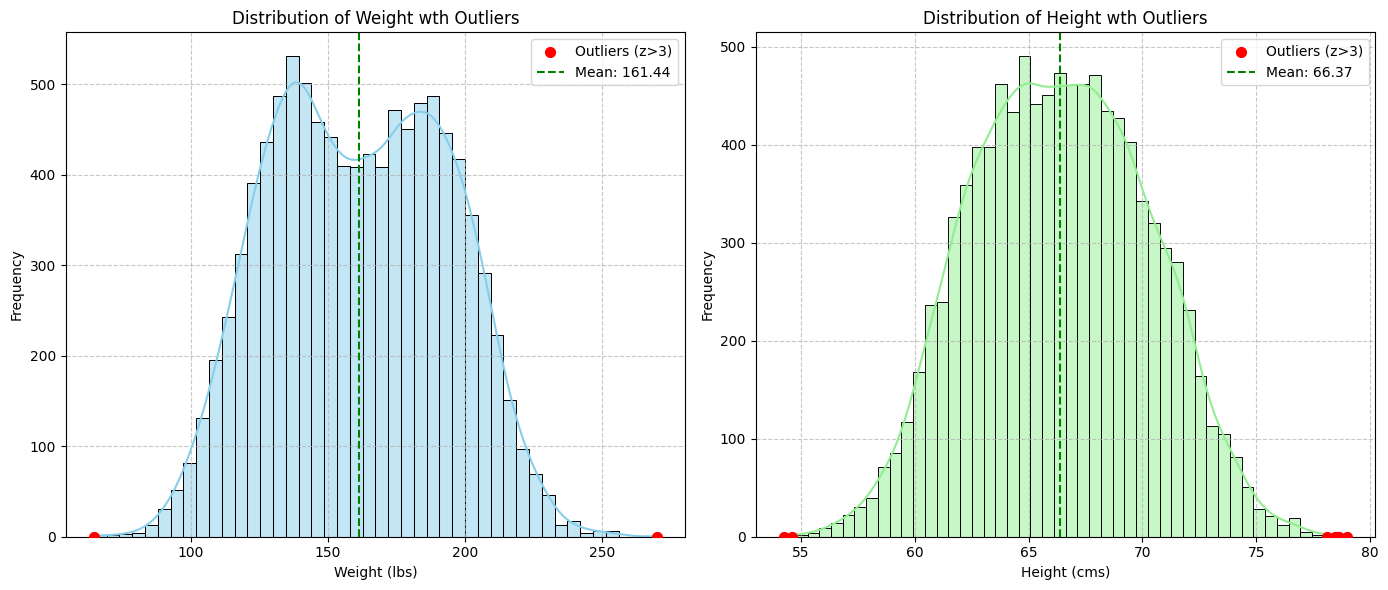

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
#Plot for Weight
plt.subplot(1,2,1)
plt.scatter(weight_outliers['Weight'],[0]*len(weight_outliers), color = 'red', s =50,zorder = 5,  label = f'Outliers (z>{zscore_threshold})')

sns.histplot(df['Weight'], kde=True, color='skyblue')
#Plot Outliers at y=0 for clarity
plt.axvline(weight_mean, color='green', linestyle='--', label = f'Mean: {weight_mean:.2f}')
plt.title('Distribution of Weight wth Outliers')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.7)

#Plot for Height
plt.subplot(1,2,2)
sns.histplot(df['Height'], kde=True, color='lightgreen')
#Plot Outliers at y=0 for clarity
plt.scatter(height_outliers['Height'],[0]*len(height_outliers), color = 'red', s =50, zorder = 5, label = f'Outliers (z>{zscore_threshold})')
plt.axvline(height_mean, color='green', linestyle='--', label = f'Mean: {height_mean:.2f}')
plt.title('Distribution of Height wth Outliers')
plt.xlabel('Height (cms)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

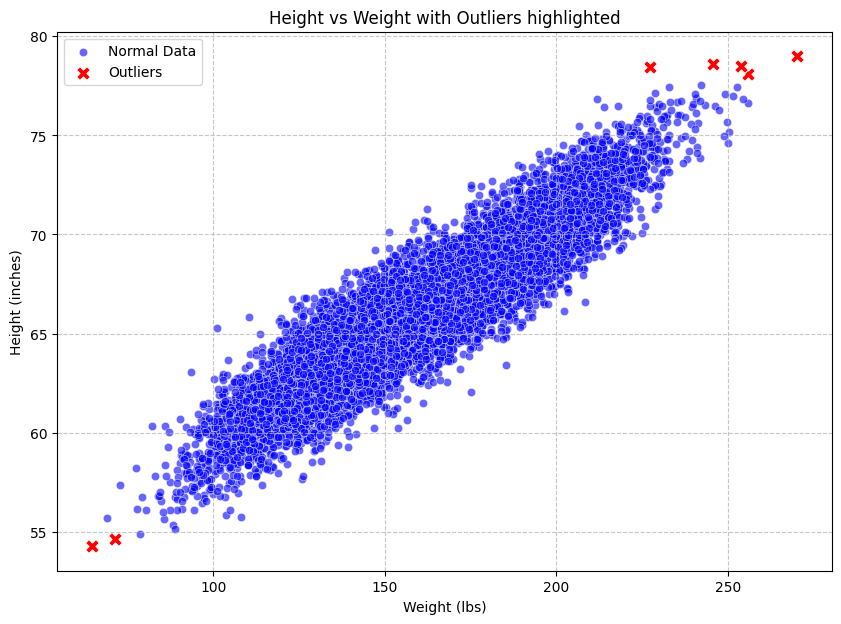

In [19]:
#Scatter plot of Height vs Weight with outliers highlighted
plt.figure(figsize=(10,7))
sns.scatterplot(x = df['Weight'], y = df['Height'], color = 'blue', alpha = 0.6, label = 'Normal Data')
sns.scatterplot(x = all_outliers['Weight'], y = all_outliers['Height'], color = 'red', s=100, label = 'Outliers', marker = 'X')
plt.title('Height vs Weight with Outliers highlighted')
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (inches)')
plt.legend()
plt.grid(True, linestyle='--', alpha = 0.7)
plt.show()

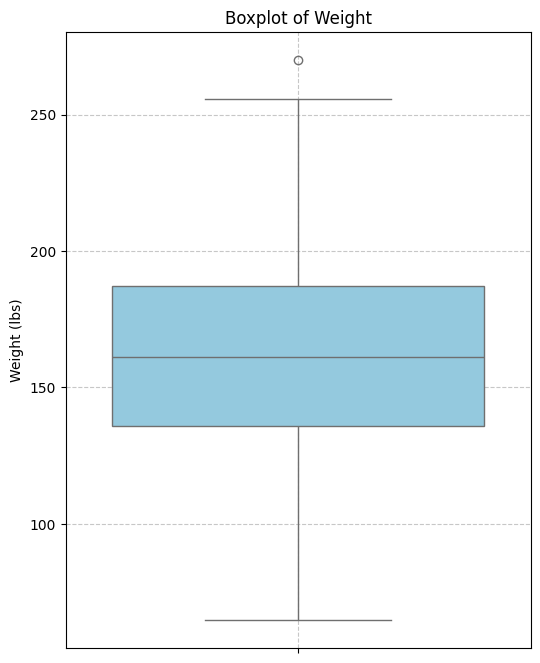

In [20]:
# Box plot for Weight

plt.figure(figsize=(6,8))
sns.boxplot(y=df['Weight'], color = 'skyblue')
plt.title('Boxplot of Weight')
plt.ylabel('Weight (lbs)')
plt.grid(True, linestyle='--', alpha = 0.7)
plt.show()

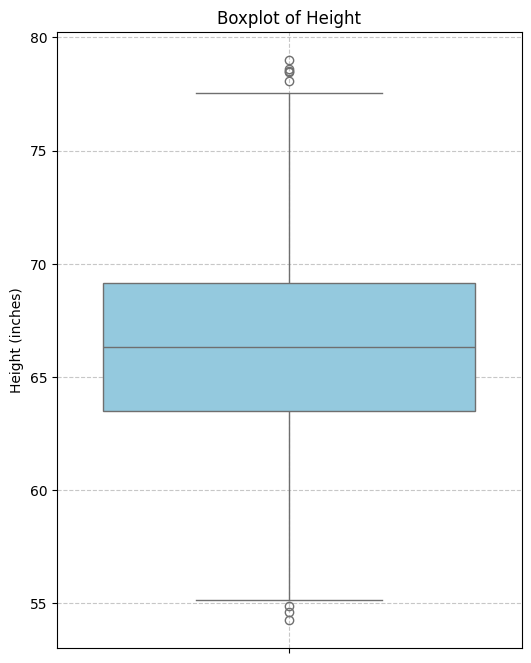

In [21]:
# Box plot for Height

plt.figure(figsize=(6,8))
sns.boxplot(y=df['Height'], color = 'skyblue')
plt.title('Boxplot of Height')
plt.ylabel('Height (inches)')
plt.grid(True, linestyle='--', alpha = 0.7)
plt.show()